# 3.5 И на Марсе будут яблони цвести

## Посадим ещё несколько лесов для закрепления материала!

In [1]:
import pandas as pd

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

## Данные о съедобности грибов для части заданий. Взяты отсюда,
https://stepik.org/media/attachments/course/4852/training_mush.csv
все категориальные переменные были закодированы числами для простоты.

In [13]:
df=pd.read_csv('training_mush.csv')

In [3]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6093 entries, 0 to 6092
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 6093 non-null   int64
 1   cap-surface               6093 non-null   int64
 2   cap-color                 6093 non-null   int64
 3   bruises                   6093 non-null   int64
 4   odor                      6093 non-null   int64
 5   gill-attachment           6093 non-null   int64
 6   gill-spacing              6093 non-null   int64
 7   gill-size                 6093 non-null   int64
 8   gill-color                6093 non-null   int64
 9   stalk-shape               6093 non-null   int64
 10  stalk-root                6093 non-null   int64
 11  stalk-surface-above-ring  6093 non-null   int64
 12  stalk-surface-below-ring  6093 non-null   int64
 13  stalk-color-above-ring    6093 non-null   int64
 14  stalk-color-below-ring    6093 non-null 

In [22]:
y_train = df['class']
X_train = df.drop(['class'], axis=1)


# задание

##### Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, 

указанных в предыдущем стэпе. 

Передайте в GridSearchCV модель с указанием random_state

RandomForestClassifier(random_state=0)

Параметры для выбора -


n_estimators: от 10 до 50 с шагом 10

max_depth: от 1 до 12 с шагом 2

min_samples_leaf: от 1 до 7

min_samples_split: от 2 до 9 с шагом 2

Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, 

чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [ ]:
# RandomForestClassifier(random_state=0)

In [24]:
clf = RandomForestClassifier(random_state=0)
# parametrs = {'n_estimators': [10,20,30,40], 'max_depth': [2,5,7,10]}
parametrs = {
    'n_estimators':range(10,51,10),
    'max_depth':range(1,13,2),
    'min_samples_leaf':range(1,8),
    'min_samples_split':range(2,10,2)   
    }
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=3)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

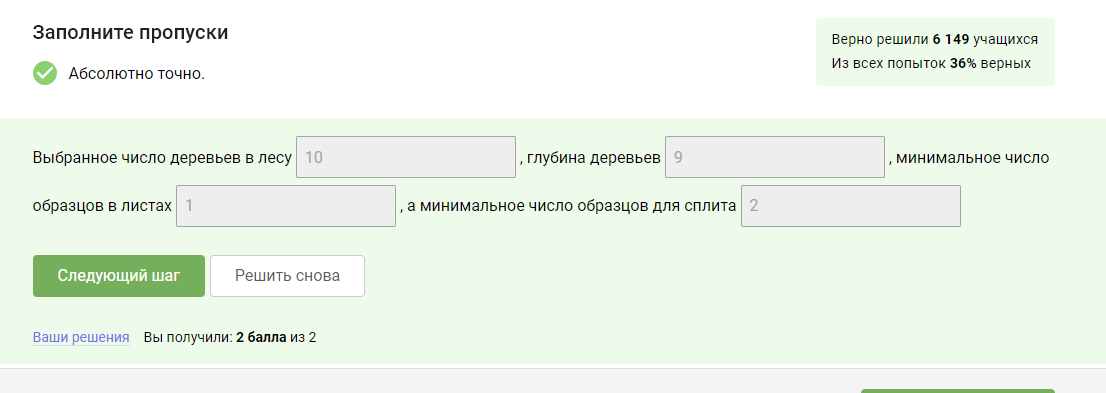

### Может кому-то будет полезно:
Я работаю из PyCharm, поэтому чтобы не обучать модель каждый раз заново можно ее сохранить и потом загружать снова:

from joblib import dump, load

dump(best_clf_rf, 'mushroom_model.joblib') (это сохранить)

best_clf_rf = load('mushroom_model.joblib') (это загрузить)

 На следующих заданиях у меня по сохраненной модели все сработало

##### чужие решения

In [ ]:
import pandas as pd

# Библиотеки для машинного обучения
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Загрузка данных (верные ответы в поле class)
df = pd.read_csv('/content/drive/My Drive/SampleData/training_mush.csv')
X_train = df.drop('class', axis=1)
y_train = df['class']

# Объявляем классификатор и параметры для перебора
clf_RF = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators':      range(10, 50, 10),
             'max_depth':         range(1, 12, 2),
             'min_samples_leaf':  range(1, 7),
             'min_samples_split': range(2, 9, 2)}

# Запускаем обучение
clf_grid = GridSearchCV(clf_RF, param_grid=parametrs, cv=3, n_jobs=-1)
clf_grid.fit(X_train, y_train)

# Получаем лучшие параметры от лучшей обученной модели.
print('Лучшие параметры Леса:', clf_grid.best_params_)

>>> Лучшие параметры Леса: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


# вопрос

## Выберите правильные утверждения о важности фичей для нашего классификатора

In [27]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [30]:
best_clf=grid_search_cv_clf.best_estimator_

In [31]:
best_clf.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [32]:
feature_importances_df = pd.DataFrame({'features':list(X_train.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances')

In [37]:
feature_importances_df.sort_values(by='feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


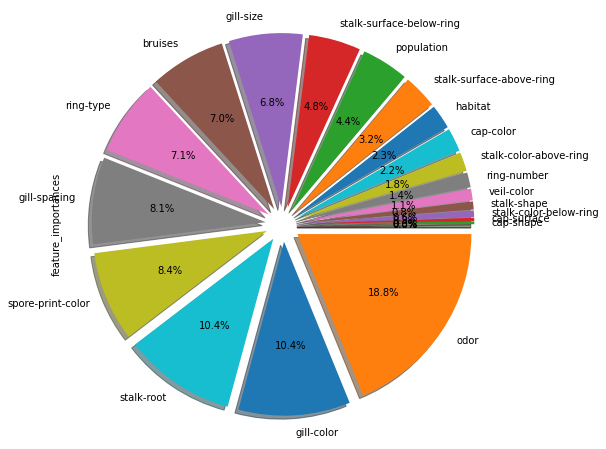

In [34]:
feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

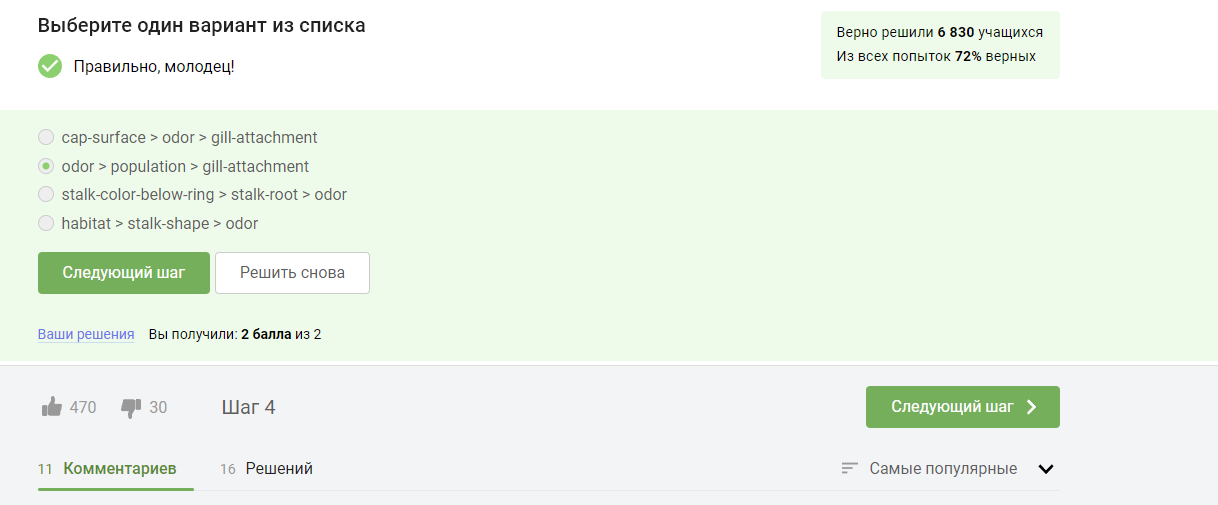

## чужие решения

In [38]:
fi = grid_search_cv_clf.best_estimator_.feature_importances_
fi_df = pd.DataFrame({'features': X_train.columns, 'importance': fi})

v = ['cap-surface > odor > gill-attachment',
     'odor > population > gill-attachment',
     'stalk-color-below-ring > stalk-root > odor',
     'habitat > stalk-shape > odor']

for var in v:
    feats = [s.strip() for s in var.split('>')]
    imps = [fi_df[fi_df.features == feats[i]]['importance'].item() for i in (0, 1, 2)]
    print('+', var) if imps[0] > imps[1] > imps[2] else print('-', var)

- cap-surface > odor > gill-attachment
+ odor > population > gill-attachment
- stalk-color-below-ring > stalk-root > odor
- habitat > stalk-shape > odor


- cap-surface > odor > gill-attachment
+ odor > population > gill-attachment
- stalk-color-below-ring > stalk-root > odor
- habitat > stalk-shape > odor

## чужие решения

In [ ]:
# Импортируем необходимые модули
# для работы с данными:
import pandas as pd

# для построения леса деревьев решений и обучения моделей:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# для работы с графикой:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем размер области для построения графиков.
sns.set(rc={'figure.figsize': (17, 6)})

# Считываем файл c данными о съедобности грибов.
mush_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

# Отбросим колонку, которую будем предсказывать.
X = mush_data.drop(['class'], axis=1)
# Создадим переменную, которую будем предсказывать.
y = mush_data['class']

# Создаем модель RandomForestClassifier.
rf = RandomForestClassifier(random_state=0)

# Задаем параметры модели.
parameters = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2),
              'min_samples_leaf': range(1,8), 'min_samples_split': range(2,10,2)}

# Обучение Random forest моделей GridSearchCV.
GridSearchCV_clf = GridSearchCV(rf, parameters, cv=3, n_jobs=-1)
GridSearchCV_clf.fit(X, y)

# Преобразование, позволяющее определить важность переменных.
best_clf = GridSearchCV_clf.best_estimator_

# Создадим атрибут feature_importances и сохраним его в отдельную переменную.
feature_importances = best_clf.feature_importances_
# и сделаем DataFrame, одна колонка - имена переменных, другая - важность переменных, отсортированные по убыванию.
feature_importances_df = pd.DataFrame({'features': list(X), 'feature_importances': feature_importances})\
    .sort_values(by='feature_importances', ascending=False)

# Построение графика.
f, ax = plt.subplots()
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title('Наиболее важные атрибуты')
plt.show()

# вопрос

## Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его!
https://stepik.org/media/attachments/course/4852/testing_mush.csv
Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

 

Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, 

часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.

То есть в этом случае нам придётся самим экстрагировать признаки из объекта. 

Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба.

И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. 

Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [39]:
df_test = pd.read_csv('testing_mush.csv')

In [40]:
df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 2031 non-null   int64
 1   cap-surface               2031 non-null   int64
 2   cap-color                 2031 non-null   int64
 3   bruises                   2031 non-null   int64
 4   odor                      2031 non-null   int64
 5   gill-attachment           2031 non-null   int64
 6   gill-spacing              2031 non-null   int64
 7   gill-size                 2031 non-null   int64
 8   gill-color                2031 non-null   int64
 9   stalk-shape               2031 non-null   int64
 10  stalk-root                2031 non-null   int64
 11  stalk-surface-above-ring  2031 non-null   int64
 12  stalk-surface-below-ring  2031 non-null   int64
 13  stalk-color-above-ring    2031 non-null   int64
 14  stalk-color-below-ring    2031 non-null 

In [41]:
predicted = grid_search_cv_clf.predict(df_test)

In [44]:
predicted.sum()

976

In [48]:
predicted

array([0, 0, 1, ..., 1, 0, 1])

In [49]:
import collections
collections.Counter(predicted)

Counter({0: 1055, 1: 976})

In [55]:
pd.Series(predicted).value_counts()

0    1055
1     976
dtype: int64

In [56]:
predicted.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

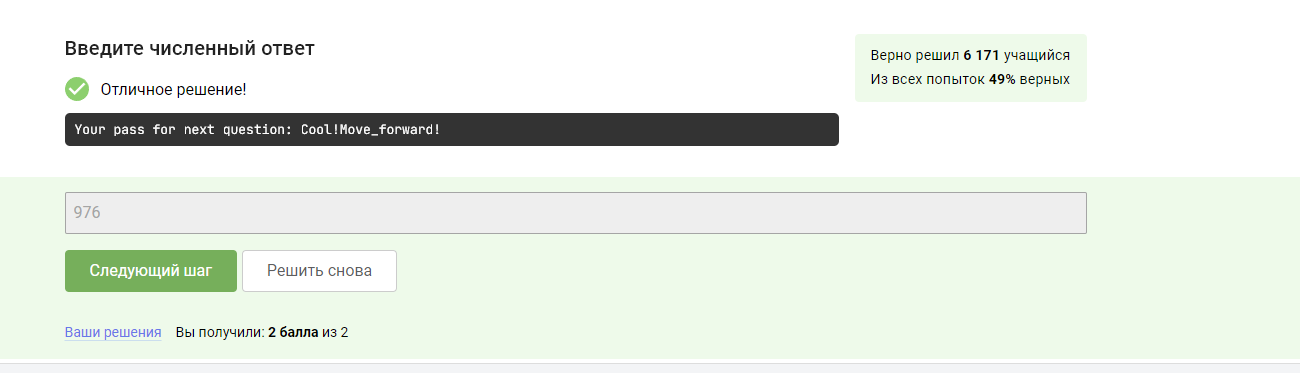

## чужое решение

In [ ]:
# Импортируем необходимые модули
# для работы с данными:
import pandas as pd

# для построения леса деревьев решений и обучения моделей:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Считываем файл c данными о съедобности грибов.
mush_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

# Отбросим колонку, которую будем предсказывать.
X = mush_data.drop(['class'], axis=1)
# Создадим переменную, которую будем предсказывать.
y = mush_data['class']

# Создаем модель RandomForestClassifier.
rf = RandomForestClassifier(random_state=0)

# Задаем параметры модели.
parameters = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2),
              'min_samples_leaf': range(1,8), 'min_samples_split': range(2,10,2)}

# Обучение Random forest моделей GridSearchCV.
GridSearchCV_clf = GridSearchCV(rf, parameters, cv=3, n_jobs=-1)
GridSearchCV_clf.fit(X, y)

# Определение наилучшего классификатора.
best_clf = GridSearchCV_clf.best_estimator_

# Считываем второй файл c данными о грибах.
mush_data_2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

# Предсказываем съедобность грибов из второго файла, используя созданный наилучший классификатор.
predictions = best_clf.predict(mush_data_2)

# Определяем число несъедобных грибов (класс равен 1).
print('Число несъедобных грибов = ', predictions.sum())

# вопрос

## Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам, 
https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip
(воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

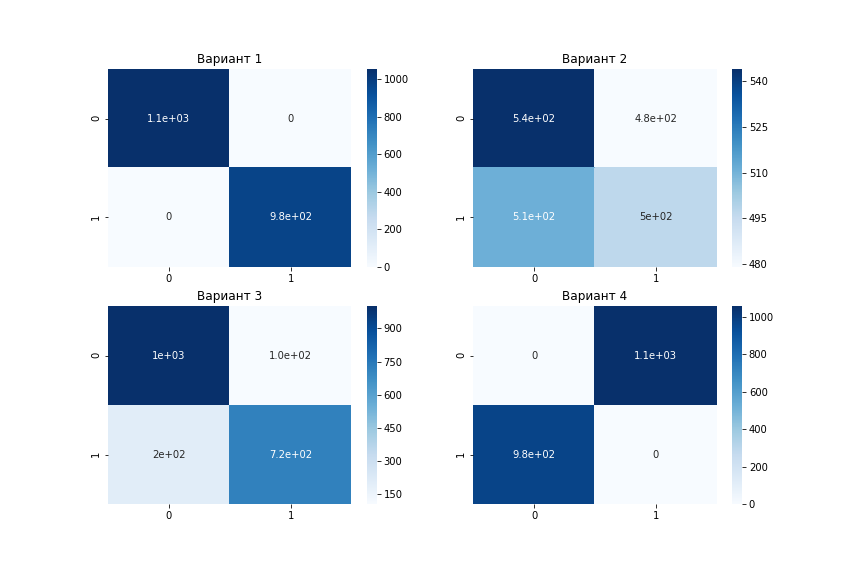

###### Пароль:
Cool!Move_forward!

###### Так как txtfiles - это список (type: 'list'), а методу open() необходимо передать в качестве параметра наименование 1 файла, то следует указать номер элемента списка.

y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd=password.encode('cp850', 'replace')))

In [53]:
# для открытия запароленого zip архива:

 
import zipfile
z = zipfile.ZipFile("testing_y_mush.csv.zip")
txtfiles = z.infolist()
y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd="Cool!Move_forward!".encode('cp850', 'replace')))

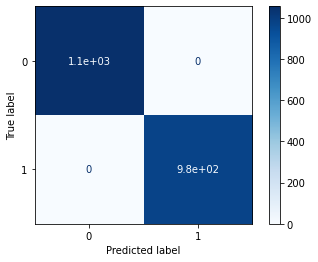

In [54]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid_search_cv_clf, df_test,y_true, cmap=plt.cm.Blues, values_format='.2g')

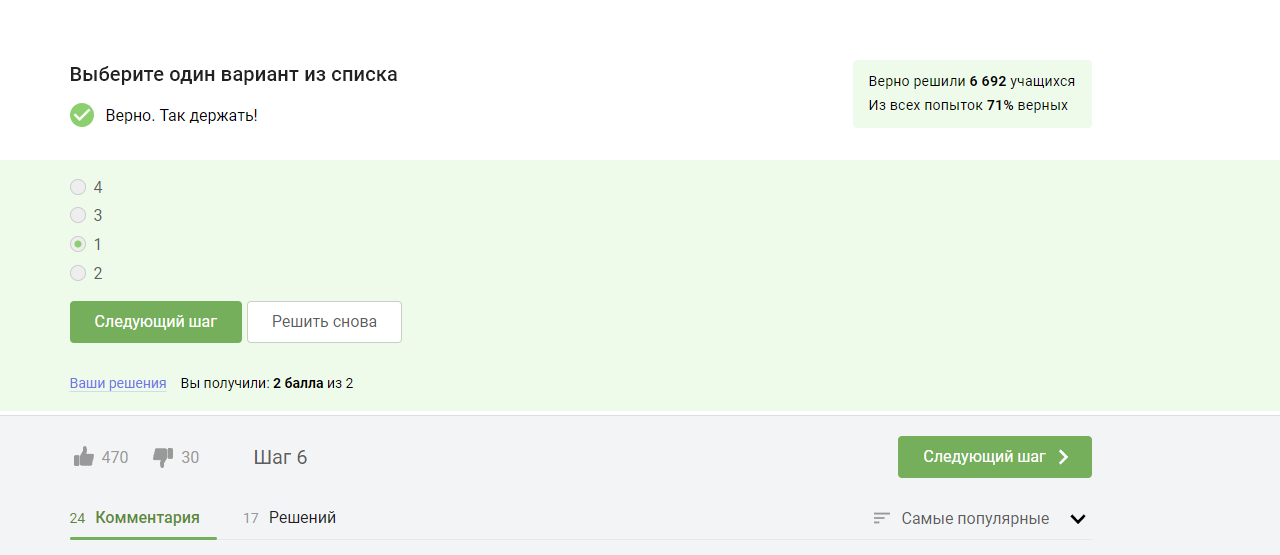

# чужое решение

In [ ]:
# Импортируем необходимые модули
# для работы с данными:
import pandas as pd
import zipfile

# для построения леса деревьев решений, обучения моделей и построения confusion_matrix:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# для работы с графикой:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем размер области для построения графиков.
sns.set(rc={'figure.figsize': (17, 6)})

# Считываем файл c данными о съедобности грибов.
mush_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

# Отбросим колонку, которую будем предсказывать.
X = mush_data.drop(['class'], axis=1)
# Создадим переменную, которую будем предсказывать.
y = mush_data['class']

# Создаем модель RandomForestClassifier.
rf = RandomForestClassifier(random_state=0)

# Задаем параметры модели.
parameters = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2),
              'min_samples_leaf': range(1,8), 'min_samples_split': range(2,10,2)}

# Обучение Random forest моделей GridSearchCV.
GridSearchCV_clf = GridSearchCV(rf, parameters, cv=3, n_jobs=-1)
GridSearchCV_clf.fit(X, y)

# Определение наилучшего классификатора.
best_clf = GridSearchCV_clf.best_estimator_

# Считываем второй файл c данными о грибах.
mush_data_2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

# Предсказываем съедобность грибов из второго файла, используя созданный наилучший классификатор.
predictions = best_clf.predict(mush_data_2)

# Пароль к zip-файлу (появился при решении предыдущей задачи).
password = 'Cool!Move_forward!'

# Считываем правильные данные по съедобности грибов из запароленного архива.
z = zipfile.ZipFile("testing_y_mush.csv.zip")
txtfiles = z.namelist()
y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd=password.encode('cp850', 'replace')))

# Создание confusion matrix по предсказаниям, полученным в прошлом уроке и правильным ответам.
sns.heatmap(confusion_matrix(y_true, predictions), annot=True, cmap="Blues")
plt.show()

# еще чужое

In [ ]:
#3.5.6
import pandas as pd 
import seaborn as sn
X_test = pd.read_csv('testing_mush.csv')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#df = pd.read_csv('training_mush.csv')
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
X = df.drop(['class'], axis = 1)
y = df['class']
parameters = {
     'n_estimators': list(range(10, 51, 10)), # число деревьев в "лесу"
     'max_depth': list(range(1, 13, 2)), # максимальная глубина
     'min_samples_split': list(range(2, 10, 2)), # минимальное число проб для разделения
     'min_samples_leaf': list(range(1, 8)) # минимальное число проб в листе
 }
rfc = RandomForestClassifier(random_state=0)
search = GridSearchCV(estimator=rfc, param_grid = parameters, cv=3, n_jobs=-1)
best_tree = search.fit(X, y)
X_test = pd.read_csv('testing_mush.csv')
predictions = best_tree.predict(X_test)
y_actu = pd.read_csv('testing_y_mush.csv')
y_pred = pd.DataFrame(predictions, columns = ['class'])
confusion_matrix = pd.crosstab(y_actu['class'], y_pred['class'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

# вопрос

## Перейдём к следующему датасэту.
https://stepik.org/media/attachments/course/4852/invasion.csv


На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. 
https://stepik.org/media/attachments/course/4852/operative_information.csv
Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [58]:
invasion = pd.read_csv('invasion.csv')

In [59]:
invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [62]:
invasion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               500 non-null    object 
 1   g_reflection        500 non-null    float64
 2   i_reflection        500 non-null    float64
 3   speed               500 non-null    float64
 4   brightness          500 non-null    float64
 5   time_of_observance  500 non-null    int64  
 6   volume              500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [64]:
invasion['class'].value_counts()

fighter      225
transport    205
cruiser       70
Name: class, dtype: int64

In [60]:
operative_information = pd.read_csv('operative_information.csv')

In [61]:
operative_information.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


##### подсказки
1. Считал invasion.csv
2. Обозначил X и y
3. Создал ЛЕС с критерием ДЖИНИ
4. Задал params (1,20,1);(1,13,2);(1,8);(2,10,2)
5. Запустил GridSearchCV(rf,params,cv=3)
6. Обучил grid
7. Обучил лес на X и y
8. Обозначил best_clf (На лучших параметрах!!! .best_params_)
9. Обучил
10. Считал operative_information. 
11. Сделал предсказания на operative_information (+записал в y_pred)
12. s = pd.Series(y_pred)
    s.groupby(s).count()
    
    И всё зашло отлично! Скажите пожалуйста, каких шагов я мог избежать? Какие здесь лишние?

второй раз обучать излишне.  Получили из GridSearchCV классификатор, обучили его на X и y, вызвали predict этого классификатора (там и так сохранился лучший вариант).

In [76]:
X_train = invasion.drop(['class'], axis=1)
y_train = invasion['class']

In [67]:
y_train.head()

0    transport
1    transport
2    transport
3      fighter
4      fighter
Name: class, dtype: object

С функцией map можно заменить в колонке class названия транспорта на числа

transport = {'transport' :  0,  'fighter' :  1,  'cruiser' : 2}

y_train = data_invasion['class'].map(transport)

###  плюсую . все работает с начальными значениями класса

In [69]:
# transport = {'transport' :  0,  'fighter' :  1,  'cruiser' : 2}
# y_train = invasion['class'].map(transport)
# y_train.head()

0    0
1    0
2    0
3    1
4    1
Name: class, dtype: int64

In [77]:
clf = RandomForestClassifier(random_state=0)
# parametrs = {'n_estimators': [10,20,30,40], 'max_depth': [2,5,7,10]}
parametrs = {
    'n_estimators':range(10,51,10),
    'max_depth':range(1,13,2),
    'min_samples_leaf':range(1,8),
    'min_samples_split':range(2,10,2)   
    }
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=3)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [78]:
predicted = grid_search_cv_clf.predict(operative_information)
pd.Series(predicted).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [79]:
# Не надо туда сюда
# predicted.replace({ 0:'transport', 1:'fighter', 2:'cruiser'})

In [74]:
pd.Series(predicted).value_counts()

1    675
0    595
2    230
dtype: int64

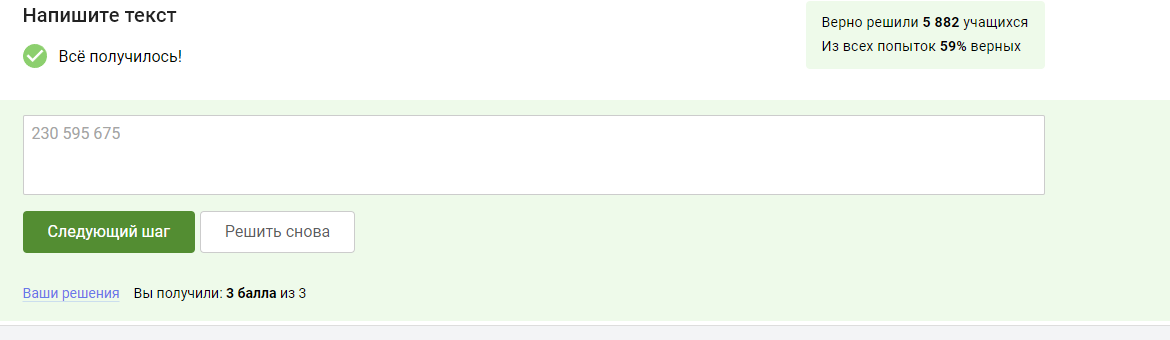

# Чужое решение

In [ ]:
Подключаем файлы.

invasion = pd.read_csv("https://stepik.org/media/attachments/course/4852/invasion.csv", sep=',')
operative_information = pd.read_csv("https://stepik.org/media/attachments/course/4852/operative_information.csv", sep=',')﻿
Случайный лес, параметры для ﻿обучения взял из задания про грибы. ﻿

invasion.head()
invasion.rename(columns={'class': 'ship_class'}, inplace=True)

X = invasion.drop(['ship_class'], axis=1)
y = invasion.ship_class

clf = RandomForestClassifier(random_state=0, criterion='entropy')
param = {'n_estimators': range(10,50,10), 'max_depth': range(1,12,2), 'min_samples_leaf': range(1,7), 'min_samples_split': range(2,9,2)} 
search = GridSearchCV(clf, param, n_jobs=-1, cv=3)
search.fit(X, y)

predictions = search.predict(operative_information)

y_test = pd.Series(predictions)
y_test.value_counts()


# Чужое решение

In [ ]:
Сначала посчитал через DecisionTree и ответ принялся, потом ради интереса через RandomForest. Обе функции использовал со стандартными параметрами:


inv = pd.read_csv('invasion.csv')
X = inv.drop(['class'], axis=1)
y = inv['class']

inv_clf_dtc = DecisionTreeClassifier()
inv_clf_dtc.fit(X, y)


oi = pd.read_csv('operative_information.csv')
predictions = inv_clf_dtc.predict(oi)
pd.Series(predictions).value_counts()

# чужое решение

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import collections

df_train = pd.read_csv('invasion.csv')
df_test = pd.read_csv('operative_information.csv')

X_train = df_train.drop('class', axis=1)
X_test = df_test

transport = {'transport': 0, 'fighter': 1, 'cruiser': 2}


y_train = df_train['class'].map(transport)

clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(pd.Series(predictions).value_counts())

# # or

# transport = {0: 'transport', 1: 'fighter', 2: 'cruiser'}
# for i, k in collections.Counter(predictions).items():
#     print(transport[i], k)


# вопрос

## Какая переменная оказалась самой важной для классифицирования кораблей?

In [80]:
best_clf=grid_search_cv_clf.best_estimator_

In [81]:
feature_importances_df = pd.DataFrame({'features':list(X_train.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances')

In [82]:
feature_importances_df.sort_values(by='feature_importances', ascending=False)

,features,feature_importances
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


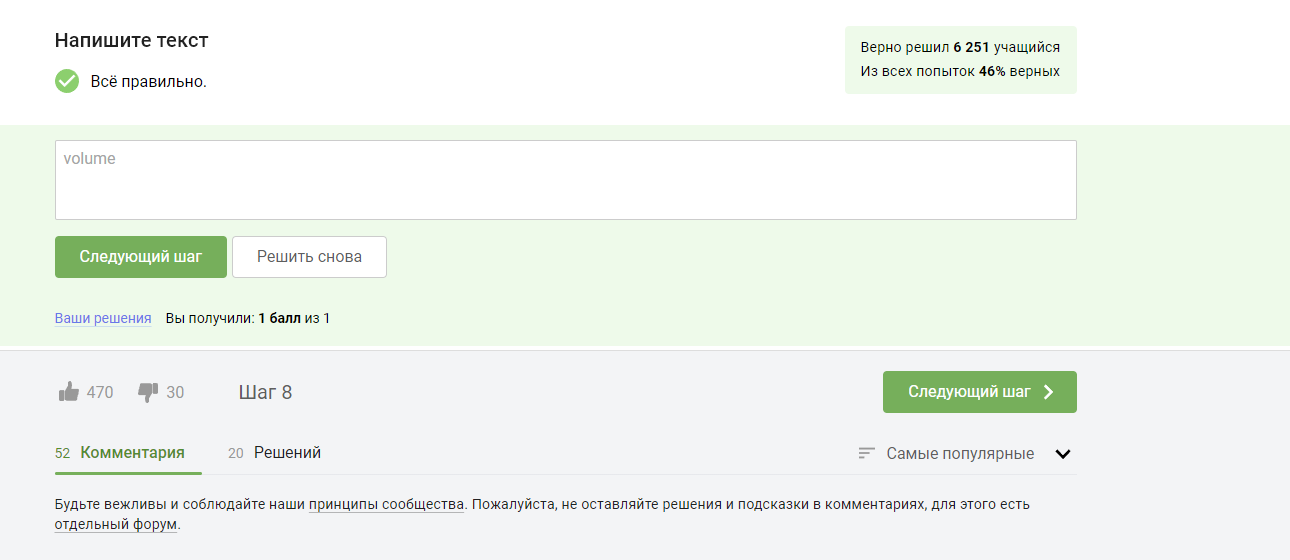

# Чужое решение

In [ ]:
# Импортируем необходимые модули
# для работы с данными:
import pandas as pd

# для построения леса деревьев решений, обучения моделей и построения confusion_matrix:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Считываем файлы c данными о войсках жукеров.
aliens_data_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
aliens_data_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

# Создаем подмножества train и test.
X_train = aliens_data_train.drop(['class'], axis=1)
y_train = aliens_data_train['class']
X_test = aliens_data_test

# Конвертируем все строковые переменные в числовые.
y_train = pd.get_dummies(y_train)

# Создаем модель RandomForestClassifier.
rf = RandomForestClassifier(random_state=0)

# Задаем параметры модели.
parameters = {'n_estimators': [30], 'max_depth': [10]}

# Обучение Random forest моделей GridSearchCV для крейсеров, транспортников и истребителей.
cruiser_clf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)
cruiser_clf.fit(X_train, y_train['cruiser'])
transport_clf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)
transport_clf.fit(X_train, y_train['transport'])
fighter_clf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)
fighter_clf.fit(X_train, y_train['fighter'])

# Определение наилучших классификаторов для крейсеров, транспортников и истребителей.
cruiser_best_clf = cruiser_clf.best_estimator_
transport_best_clf = transport_clf.best_estimator_
fighter_best_clf = fighter_clf.best_estimator_

# Предсказываем классы кораблей для новых поступающих данных из второго файла,
# используя созданные наилучшие классификаторы.
cruiser_pred = cruiser_best_clf.predict(X_test)
transport_pred = transport_best_clf.predict(X_test)
fighter_pred = fighter_best_clf.predict(X_test)

# Создадим атрибут feature_importances и сохраним его в отдельные переменные.
cruiser_feature_importances = cruiser_best_clf.feature_importances_
transport_feature_importances = transport_best_clf.feature_importances_
fighter_feature_importances = fighter_best_clf.feature_importances_

# Создадим DataFrames, одна колонка - имена переменных, другая - важность переменных, отсортированные по убыванию.
cruiser_feature_importances_df = pd.DataFrame({'features': list(X_train),
                                               'feature_importances': cruiser_feature_importances})\
    .sort_values(by='feature_importances', ascending=False)
transport_feature_importances_df = pd.DataFrame({'features': list(X_train),
                                               'feature_importances': transport_feature_importances})\
    .sort_values(by='feature_importances', ascending=False)
fighter_feature_importances_df = pd.DataFrame({'features': list(X_train),
                                               'feature_importances': fighter_feature_importances})\
    .sort_values(by='feature_importances', ascending=False)

print('Посмотрим Data Frames важности переменных')
print('для крейсеров:')
print(cruiser_feature_importances_df.head(3))
print()
print('для транспортников:')
print(transport_feature_importances_df.head(3))
print()
print('для истребителей:')
print(fighter_feature_importances_df.head(3))
print()

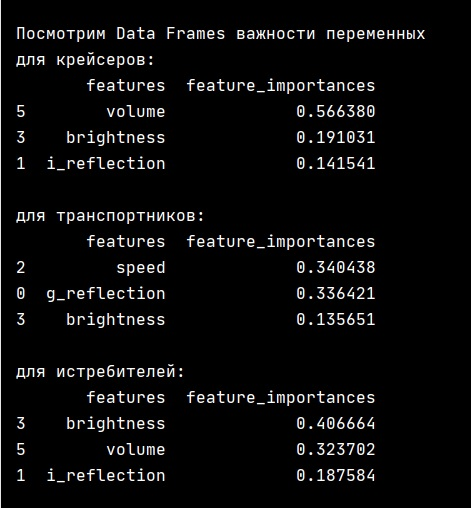

# вопрос

##### Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена!
Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.
https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv
Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [3]:
df2 = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [4]:
df2.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [6]:
X_train = df2.drop('dangerous', axis=1)
y_train = df2.dangerous

In [7]:
df2.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


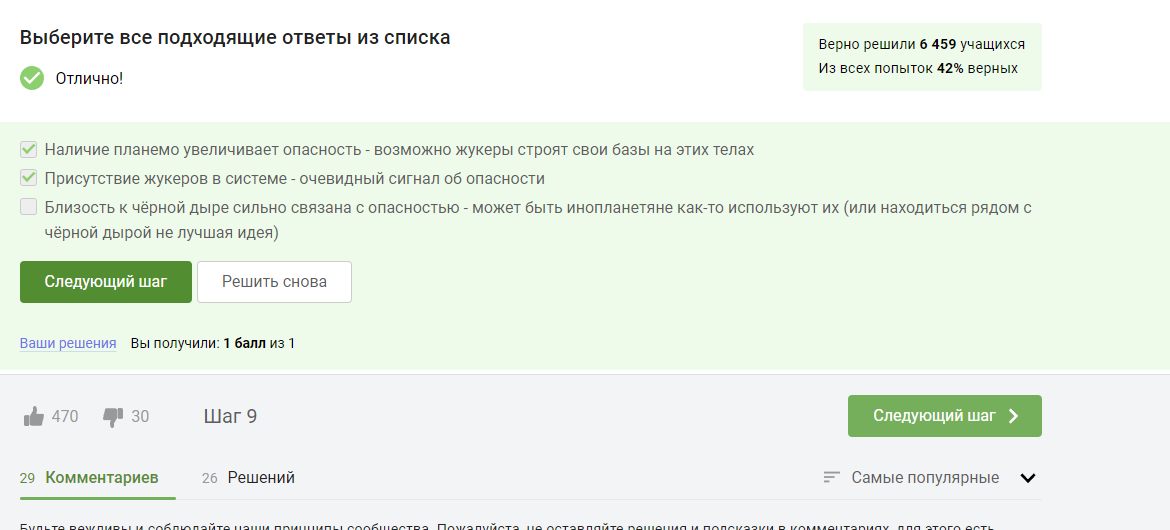

# чужие решения

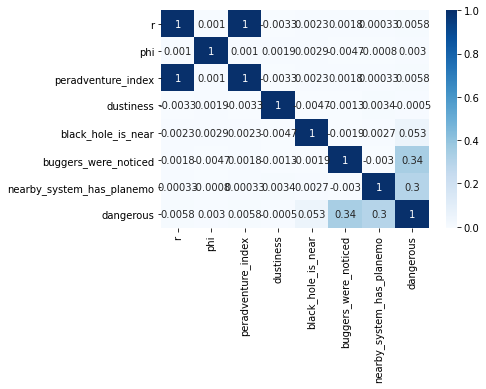

In [8]:
sns.heatmap(df2.corr(), annot=True, cmap=plt.cm.Blues)

In [9]:
# Вычисляем попарную корреляцию столбцов в DataFrame.
print(df2.corr().sort_values(by='dangerous', ascending=False))

                                  r       phi  peradventure_index  dustiness  \
dangerous                  0.005788  0.003035            0.005788  -0.000499   
buggers_were_noticed       0.001797 -0.004726            0.001797  -0.001290   
nearby_system_has_planemo  0.000326 -0.000803            0.000326   0.003370   
black_hole_is_near         0.002337  0.002875            0.002337  -0.004691   
peradventure_index         1.000000  0.001023            1.000000  -0.003336   
r                          1.000000  0.001023            1.000000  -0.003336   
phi                        0.001023  1.000000            0.001023   0.001921   
dustiness                 -0.003336  0.001921           -0.003336   1.000000   

                           black_hole_is_near  buggers_were_noticed  \
dangerous                            0.052968              0.344469   
buggers_were_noticed                -0.001874              1.000000   
nearby_system_has_planemo            0.002661             -0.00303

In [11]:
clf_kosmos = RandomForestClassifier()

clf_kosmos.fit(X_train,y_train)

best_kosmos =clf_kosmos.feature_importances_

dataf = pd.DataFrame({'1':list(X_train), '2':best_kosmos})

dataf.sort_values("2")

,1,2
4,black_hole_is_near,0.003536
6,nearby_system_has_planemo,0.090169
5,buggers_were_noticed,0.119979
1,phi,0.175609
2,peradventure_index,0.185286
0,r,0.185904
3,dustiness,0.239517
